### Codio Activity 16.7: Visualizing Decision Boundaries

This activity focuses on visualizing the decision boundaries of the available kernel function in the `SVC` class.  You are given a function `decision_boundary` that takes in a fit `SVC` estimator and will draw the boundary of the decision function in a similar way to that from the previous assignment.  Examine this function below -- most of the code is directly available in examples from the scikitlearn documentation [here](https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-py) and [here](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_nonlinear.html#sphx-glr-auto-examples-svm-plot-svm-nonlinear-py) for example.


#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)
- [Problem 4](#-Problem-4)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

### The Data

A similar synthetic dataset is created below to fit different versions of the `SVC` class.  The simple dataset demonstrates the different basic geometries of the decision boundary from each available kernel.  In the next assignment you will tune these boundaries using parameters of the support vector classifier.

In [2]:
X, y = make_blobs(centers = 2, cluster_std = 3, random_state = 42)

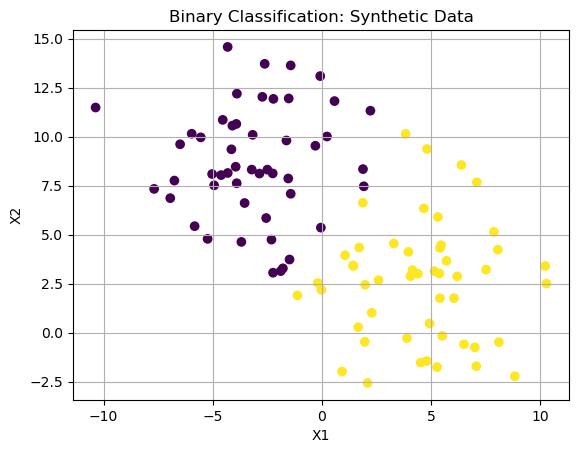

In [3]:
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.title('Binary Classification: Synthetic Data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid();

In [4]:
def decision_boundary(svc, kernel = 'linear'):
    '''
    This function takes in a fit SVC classifier
    and draws a decision boundary based on the first 
    two features in array X.
    '''
    h = 0.1
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z3 = svc.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy,  Z3, cmap = 'Blues', alpha = 0.4)
    plt.scatter(X[:, 0], X[:, 1], c = y)
    plt.title(f'{kernel} Boundary from SVC');

### Problem 1

#### Linear Decision Boundary

Below, fit an `SVC` classifier with `kernel = 'linear'` and assign to the variable `svc_linear`.  Use the `decision_boundary` function to visualize this.

In [5]:
svc_linear = SVC(kernel = 'linear').fit(X,y)

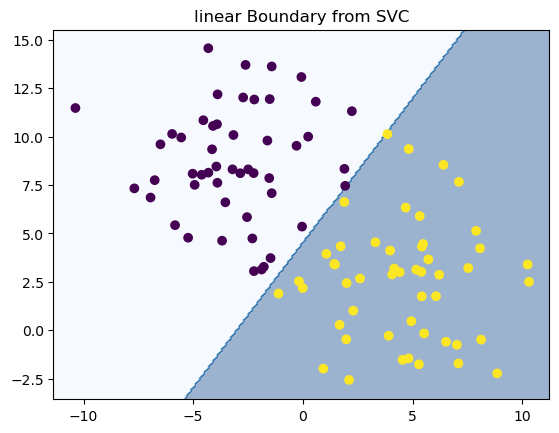

In [6]:
decision_boundary(svc_linear)

### Problem 2

#### Polynomial Decision Boundary

Below, fit an `SVC` classifier with `kernel = 'poly'` and assign to the variable `svc_poly`.  Use the `decision_boundary` function to visualize this. Note that the default degree polynomial is 3.  Use `decision_boundary` to visualize the results and pass the `kernel = 'Polynomial'` argument to adjust the title.

In [7]:
svc_poly = SVC(kernel = 'poly').fit(X,y)

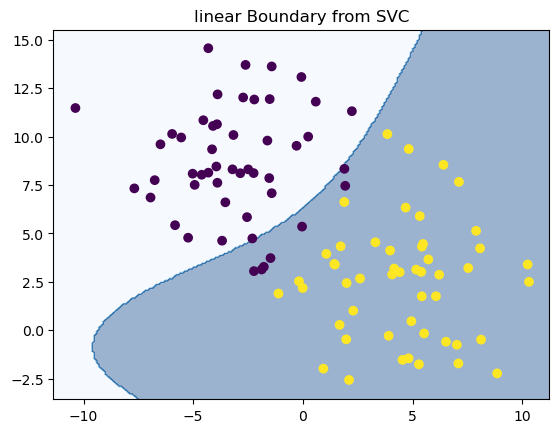

In [8]:
decision_boundary(svc_poly)

### Problem 3

#### Gaussian Decision Boundary

Below, fit an `SVC` classifier with `kernel = 'rbf'` and assign to the variable `svc_gauss`.  Use the `decision_boundary` function to visualize this. Note that this is the default kernel for the `SVC`.  Use `decision_boundary` to visualize the results and pass the `kernel = 'Gaussian'` argument to adjust the title. 

In [9]:
svc_gauss = SVC(kernel = 'rbf').fit(X,y)

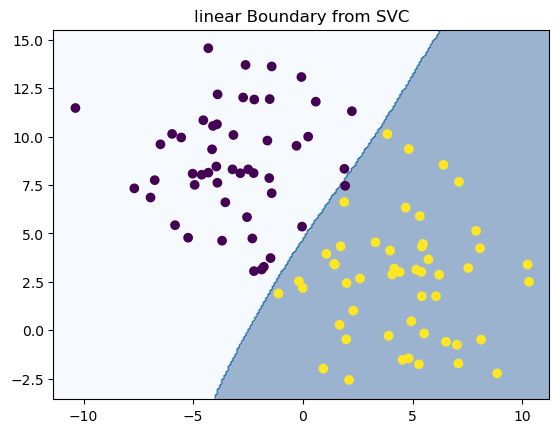

In [10]:
decision_boundary(svc_gauss)

### Problem 4

#### Sigmoid Decision Boundary

Below, fit an `SVC` classifier with `kernel = 'sigmoid'` and assign to the variable `svc_sigmoid`.  Use the `decision_boundary` function to visualize this. Use `decision_boundary` to visualize the results and pass the `kernel = 'Sigmoid'` argument to adjust the title. 

In [11]:
svc_sigmoid = SVC(kernel = 'sigmoid').fit(X,y)

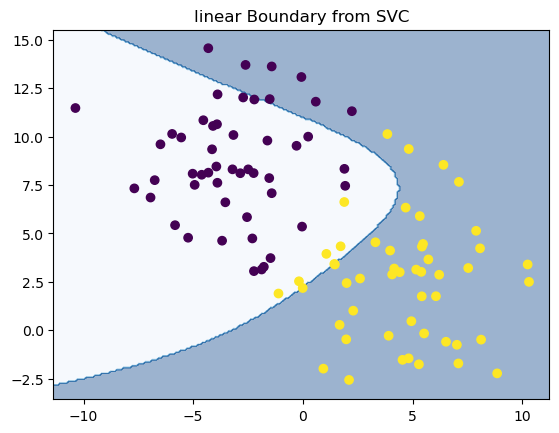

In [12]:
decision_boundary(svc_sigmoid)

### Codio Activity 16.8: Tuning the `SVC` Classifier

This activity focuses on tuning the `SVC` classifier parameters to improve its performance using the wine data.  Typically, the `SVC` will need some parameter tuning.  In practice, you will want to be deliberate about the tuning parameters and not be too exhaustive as the grid searches can be energy intensive.  Here, you will compare different kernels and the `gamma` parameter of the classifier.

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)
- [Problem 4](#-Problem-4)

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_wine

In [3]:
X, y = load_wine(return_X_y=True, as_frame=True)

In [4]:
y.value_counts(normalize = True)

target
1    0.398876
0    0.331461
2    0.269663
Name: proportion, dtype: float64

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

### Problem 1

#### Baseline for Classifier

Below, determine the baseline score for the classifier by using the `DummyClassifier` with the training data.  Score the estimator on the test set and assign this to `baseline_score` below.  **Note**: The `DummyClassifier` works just as all other estimators you have encountered and has a `.fit` and `.score` method.

In [6]:
dummy_clf = DummyClassifier().fit(X_train,y_train)
dummy_clf

DummyClassifier()

In [7]:
baseline_score = dummy_clf.score(X_test, y_test)
baseline_score

0.4

### Problem 2

#### Default Settings with `SVC`

Now, fit an `SVC` estimator on the training data with default settings and score this on the test data.  Assign your answer as a float to `svc_defaults` below.

In [8]:
svc = SVC().fit(X_train, y_train)
svc_defaults = svc.score(X_test, y_test)

In [9]:
svc_defaults

0.7111111111111111

### Problem 3

#### Grid Searching with `SVC`

While your svc should improve upon the baseline score, there is possible room for improvement.  Below, grid search the different kernels available with the `SVC` estimator as well as some different `gamma` values using the `params` dictionary below.  Create your grid and use `cv = 5`.  Assign the score on the test data to `grid_score` below.  

In [10]:
params = {'kernel': ['rbf', 'poly', 'linear', 'sigmoid'],
         'gamma': [0.1, 1.0, 10.0, 100.0],}

In [11]:
grid = GridSearchCV(svc,param_grid = params).fit(X_train,y_train)
grid

GridSearchCV(estimator=SVC(),
             param_grid={'gamma': [0.1, 1.0, 10.0, 100.0],
                         'kernel': ['rbf', 'poly', 'linear', 'sigmoid']})

In [12]:
grid_score = grid.score(X_test, y_test)
grid_score

1.0

### Problem 4

#### Optimal Kernel Function

Based on your grid search above what is the best performing kernel function?  Assign your answer as a string -- `linear`, `poly`, `rbf`, or `sigmoid` -- to `best_kernel` below.  

In [13]:
best_kernel = grid.best_params_['kernel']
best_kernel

'poly'

### Codio Activity 16.9: Investigating your own data

For this activity, you are asked to go out and choose a dataset to build a classification model with.  Specifically, you are to compare the `LogisticRegression`, `KNearestNeighborsClassifier`, and `SVC` estimators in terms of performance and speed in model fitting.  You should optimize this model according to what metric you believe is the appropriate one for the task between `precision`, `recall`, or `accuracy`.  

In [14]:
import pandas as pd

### Gathering the data

For your dataset, consider using an example dataset from either [kaggle](https://www.kaggle.com/) or the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php).  Select an appropriate dataset that is a classification problem.  Download the data file and work in a notebook locally to perform your analysis.  Be sure to grid search different model parameters and compare the different estimators.  Construct a DataFrame of the model results with the following information:

| model | train score | test score | average fit time |
| ----- | -----   | -------   | ------- |
| KNN | ? | ? | ? |
| Logistic Regression | ? | ? | ? |
| SVC | ? | ? | ? |

The assignment will expect a DataFrame with this exact structure and index and column names.  You will be graded based on the exact match of the structure of the DataFrame.  One suggestion is to build a DataFrame and write this out to `.json`, copy and paste this below to create the DataFrame.  Alternatively, you can write it out to a `.csv` file and copy the text, or simply hardcode the DataFrame based on your results.

### Problem 1

#### DataFrame of modeling results

Assign your constructed results DataFrame to `results_df` below.  Be sure that the `model` column above is the index of the DataFrame, and the three column names match the order and formatting of the example above.

In [15]:
res_dict = {'model': ['KNN', 'Logistic Regression', 'SVC'],
           'train score': [0, 0, 0],
           'test score': [0, 0, 0],
           'average fit time': [0, 0, 0]}
results_df = pd.DataFrame(res_dict).set_index('model')

print(type(results_df))
print(results_df.shape)

<class 'pandas.core.frame.DataFrame'>
(3, 3)
